##Подготовка к обучению.

In [0]:
import cv2 as cv
import pandas as pd
import numpy as np
import imutils
from matplotlib import pyplot as plt

##Oбучение по 2 людям, тест по одному

In [74]:
import keras

img_size = (32,32)
batch_size = 30

data_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)
data_gen_aug = keras.preprocessing.image.ImageDataGenerator(rescale=1./255., rotation_range=5, horizontal_flip=True, zoom_range=0.2)

train_flow = data_gen_aug.flow_from_directory('train_2people_train_1test/train',target_size=img_size,batch_size=batch_size,class_mode='categorical', shuffle = True)
valid_flow = data_gen.flow_from_directory('test_2people_train_1test/test',target_size=img_size,batch_size=batch_size,class_mode='categorical', shuffle = False)

Found 400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [31]:
from keras.layers import *
from pandas import read_csv
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = img_size+(3,), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(units=2, activation='softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2304)             

In [0]:
train_images = 400
test_images = 200

In [33]:
hist = model.fit_generator(train_flow,
  epochs = 15,
  validation_data = valid_flow)

Epoch 1/15
14/14 [==============================] - 2s 144ms/step - loss: 0.6772 - accuracy: 0.5650 - val_loss: 0.5222 - val_accuracy: 0.9450
Epoch 2/15
14/14 [==============================] - 1s 107ms/step - loss: 0.5023 - accuracy: 0.8925 - val_loss: 0.2660 - val_accuracy: 0.9600
Epoch 3/15
14/14 [==============================] - 2s 108ms/step - loss: 0.2696 - accuracy: 0.9075 - val_loss: 0.2288 - val_accuracy: 0.9750
Epoch 4/15
14/14 [==============================] - 1s 106ms/step - loss: 0.1304 - accuracy: 0.9700 - val_loss: 0.0614 - val_accuracy: 0.9900
Epoch 5/15
14/14 [==============================] - 1s 105ms/step - loss: 0.0766 - accuracy: 0.9775 - val_loss: 0.0158 - val_accuracy: 0.9950
Epoch 6/15
14/14 [==============================] - 1s 107ms/step - loss: 0.0392 - accuracy: 0.9950 - val_loss: 0.0116 - val_accuracy: 0.9950
Epoch 7/15
14/14 [==============================] - 2s 108ms/step - loss: 0.0240 - accuracy: 0.9950 - val_loss: 0.0075 - val_accuracy: 0.9950
Epoch 

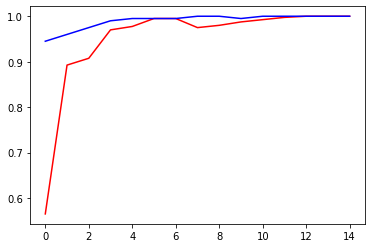

In [34]:
plt.plot(hist.history['accuracy'],color='red')
plt.plot(hist.history['val_accuracy'], color='blue')

In [44]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = img_size+(3,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 258       
Total params: 393,602
Trainable params: 393,602
Non-trainable params: 0
_________________________________________________________________


In [47]:
hist = model.fit_generator(train_flow,
  epochs = 25,
  validation_data = valid_flow)

Epoch 1/25
14/14 [==============================] - 0s 33ms/step - loss: 0.2638 - accuracy: 0.9250 - val_loss: 0.5727 - val_accuracy: 0.8100
Epoch 2/25
14/14 [==============================] - 0s 34ms/step - loss: 0.2511 - accuracy: 0.9250 - val_loss: 0.6600 - val_accuracy: 0.7750
Epoch 3/25
14/14 [==============================] - 0s 34ms/step - loss: 0.2723 - accuracy: 0.9025 - val_loss: 0.2614 - val_accuracy: 0.9250
Epoch 4/25
14/14 [==============================] - 0s 34ms/step - loss: 0.2383 - accuracy: 0.9375 - val_loss: 0.3767 - val_accuracy: 0.8900
Epoch 5/25
14/14 [==============================] - 0s 32ms/step - loss: 0.2485 - accuracy: 0.9225 - val_loss: 0.6718 - val_accuracy: 0.7800
Epoch 6/25
14/14 [==============================] - 0s 33ms/step - loss: 0.2194 - accuracy: 0.9275 - val_loss: 0.4939 - val_accuracy: 0.8650
Epoch 7/25
14/14 [==============================] - 0s 34ms/step - loss: 0.2156 - accuracy: 0.9425 - val_loss: 0.2793 - val_accuracy: 0.9400
Epoch 8/25
14

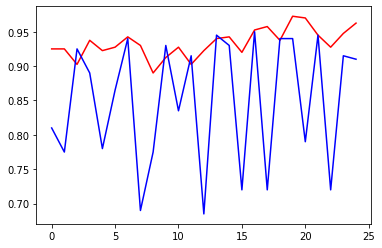

In [48]:
plt.plot(hist.history['accuracy'],color='red')
plt.plot(hist.history['val_accuracy'], color='blue')

##Разбиение 80 на 20


In [65]:
import keras

img_size = (32,32)
batch_size = 30

data_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)
data_gen_aug = keras.preprocessing.image.ImageDataGenerator(rescale=1./255., rotation_range=5, horizontal_flip=True, zoom_range=0.2)

train_flow = data_gen_aug.flow_from_directory('train_good/train',target_size=img_size,batch_size=batch_size,class_mode='categorical', shuffle = True)
valid_flow = data_gen.flow_from_directory('test_good/test',target_size=img_size,batch_size=batch_size,class_mode='categorical', shuffle = False)

Found 480 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [67]:
from keras.layers import *
from pandas import read_csv
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = img_size+(3,), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(units=2, activation='softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 2304)             

In [0]:
train_images = 480
test_images = 120

In [69]:
hist = model.fit_generator(train_flow,
  epochs = 15,
  validation_data = valid_flow)

Epoch 1/15
16/16 [==============================] - 2s 125ms/step - loss: 0.6434 - accuracy: 0.6917 - val_loss: 0.3836 - val_accuracy: 0.9417
Epoch 2/15
16/16 [==============================] - 2s 106ms/step - loss: 0.3926 - accuracy: 0.8938 - val_loss: 0.0534 - val_accuracy: 0.9667
Epoch 3/15
16/16 [==============================] - 2s 112ms/step - loss: 0.1577 - accuracy: 0.9521 - val_loss: 0.0114 - val_accuracy: 0.9667
Epoch 4/15
16/16 [==============================] - 2s 104ms/step - loss: 0.0882 - accuracy: 0.9688 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 5/15
16/16 [==============================] - 2s 111ms/step - loss: 0.0431 - accuracy: 0.9854 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 6/15
16/16 [==============================] - 2s 105ms/step - loss: 0.0284 - accuracy: 0.9917 - val_loss: 2.9579e-04 - val_accuracy: 1.0000
Epoch 7/15
16/16 [==============================] - 2s 107ms/step - loss: 0.0292 - accuracy: 0.9917 - val_loss: 9.0079e-04 - val_accuracy: 1.000

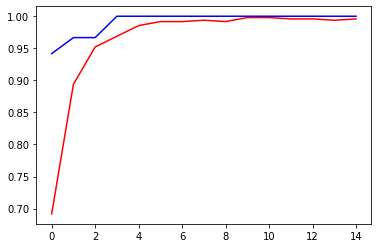

In [70]:
plt.plot(hist.history['accuracy'],color='red')
plt.plot(hist.history['val_accuracy'], color='blue')

In [71]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = img_size+(3,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 258       
Total params: 393,602
Trainable params: 393,602
Non-trainable params: 0
_________________________________________________________________


In [72]:
hist = model.fit_generator(train_flow,
  epochs = 25,
  validation_data = valid_flow)

Epoch 1/25
16/16 [==============================] - 1s 36ms/step - loss: 2.2389 - accuracy: 0.5000 - val_loss: 0.4653 - val_accuracy: 0.5000
Epoch 2/25
16/16 [==============================] - 1s 32ms/step - loss: 0.6896 - accuracy: 0.5583 - val_loss: 0.8668 - val_accuracy: 0.5000
Epoch 3/25
16/16 [==============================] - 1s 33ms/step - loss: 0.6512 - accuracy: 0.6458 - val_loss: 0.4255 - val_accuracy: 0.5000
Epoch 4/25
16/16 [==============================] - 0s 30ms/step - loss: 0.6361 - accuracy: 0.6125 - val_loss: 0.5448 - val_accuracy: 0.8083
Epoch 5/25
16/16 [==============================] - 0s 30ms/step - loss: 0.5834 - accuracy: 0.8083 - val_loss: 0.8397 - val_accuracy: 0.5500
Epoch 6/25
16/16 [==============================] - 1s 32ms/step - loss: 0.5746 - accuracy: 0.7188 - val_loss: 0.2636 - val_accuracy: 0.6000
Epoch 7/25
16/16 [==============================] - 1s 34ms/step - loss: 0.5745 - accuracy: 0.6542 - val_loss: 0.3664 - val_accuracy: 0.7833
Epoch 8/25
16

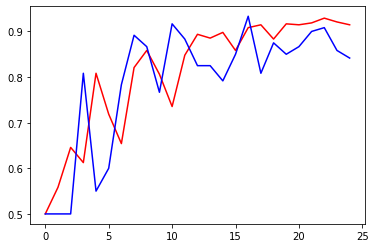

In [73]:
plt.plot(hist.history['accuracy'],color='red')
plt.plot(hist.history['val_accuracy'], color='blue')

##Тест различных параметров

In [97]:
import keras
from keras.layers import *
from pandas import read_csv
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder

img_size = (32,32)
batch_size = 30

data_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)
data_gen_aug = keras.preprocessing.image.ImageDataGenerator(rescale=1./255., rotation_range=5, horizontal_flip=True, zoom_range=0.2)

train_flow = data_gen_aug.flow_from_directory('train_2people_train_1test/train',target_size=img_size,batch_size=batch_size,class_mode='categorical', shuffle = True)
valid_flow = data_gen.flow_from_directory('test_2people_train_1test/test',target_size=img_size,batch_size=batch_size,class_mode='categorical', shuffle = False)

Found 400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [0]:
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape = img_size+(3,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
model2 =  keras.Sequential([
    keras.layers.Flatten(input_shape = img_size+(3,)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
model3 =  keras.Sequential([
    keras.layers.Flatten(input_shape = img_size+(3,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
model4 =  keras.Sequential([
    keras.layers.Flatten(input_shape = img_size+(3,)),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
model5 = keras.Sequential([
    keras.layers.Flatten(input_shape = img_size+(3,)),
    keras.layers.Dense(2, activation='softmax')
])
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
model6 =  keras.Sequential([
    keras.layers.Flatten(input_shape = img_size+(3,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])
model6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
models = [model1, model2, model3, model4, model5, model6]

In [0]:
def checking(model, train_flow, epochs_number, valid_flow):
    return model.fit_generator(train_flow, epochs = epochs_number, validation_data = valid_flow)

In [0]:
def check_models(models, train_flow, valid_flow):
    answer = []
    for i in range(len(models)):
        elem = []
        print("--------------------------------------------------------------------------------------------------------------------------------------")
        print("NEW MODEL, NUMBER : model", i + 1)
        print("--------------------------------------------------------------------------------------------------------------------------------------")
        for j in range(5, 16):
            print("========================================")
            print("Number Epochs is : ", j)
            print("========================================")
            elem.append(checking(models[i], train_flow, j, valid_flow))
        answer.append(elem)
    return answer